In [1]:
import pandas as pd
import transform
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp 
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Exploring
import scipy.stats as stats
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

# Acquire & Prepare

### import everything from folder and put them into one dataframe - race, income, age, gender, pop, pcat

In [2]:
df = transform.load_all('./Data')

In [4]:
df['income_median'] = df['income_median'].astype(int)

In [5]:
df_high_socio_hisp = df.where(df['income_median'] > 65000).dropna()

In [6]:
df_high_socio_hisp = df_high_socio_hisp.where(df_high_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna()

In [7]:
df_high_socio_hisp.shape

(38, 26)

## Binning the target variable into 'has suitable internet: 1'(cat 5), and 'does not have suitable internet: 0' (cats 1,2,3,4)

In [8]:
df["has_broadband"] = [1 if ele  > 4 else 0 for ele in df["pcat_10x1_mean"]]

### Train Test Split for Explore

In [9]:
train, test = train_test_split(df, test_size=.30, random_state=123)

# Explore

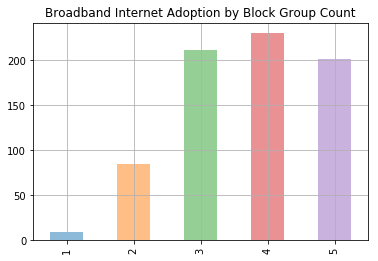

In [10]:
train.pcat_10x1_mean.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Broadband Internet Adoption by Block Group Count")
plt.grid(b = True , which = "major")

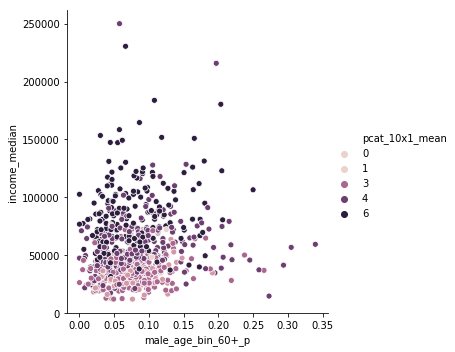

In [11]:
sns.relplot(x="male_age_bin_60+_p", y="income_median", hue="pcat_10x1_mean", data=train)

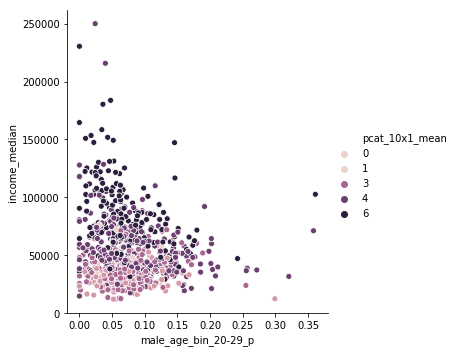

In [12]:
sns.relplot(x="male_age_bin_20-29_p", y="income_median", hue="pcat_10x1_mean", data=train)

#### age doesn't seem to be a huge driver. However, it the 20-29 age group does appear to have a higher connectivity speed.

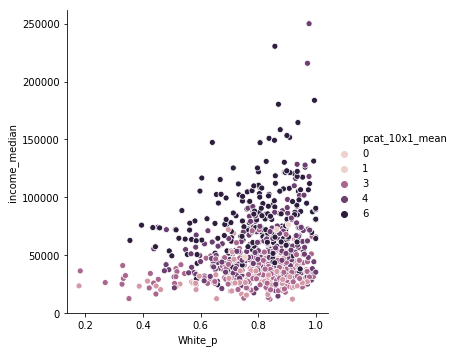

In [13]:
sns.relplot(x="White_p", y="income_median", hue="pcat_10x1_mean", data=train)

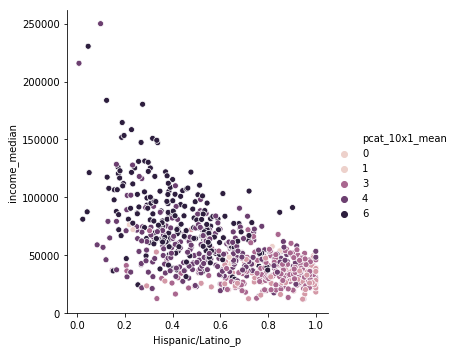

In [14]:
sns.relplot(x="Hispanic/Latino_p", y="income_median", hue="pcat_10x1_mean", data=train)

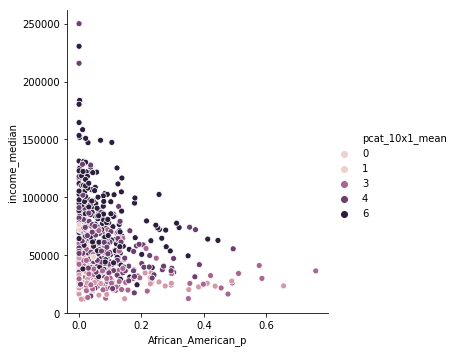

In [15]:
sns.relplot(x="African_American_p", y="income_median", hue="pcat_10x1_mean", data=train)

#### race really seems to be a large driver. The more hispanics there are in a blockgroup, the connectivity goes down and vice versa for whites.

In [59]:
def four_swarm(df):
    
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    sns.swarmplot(x="pcat_10x1_mean", y="income_median", data=df)
    plt.subplot(222)
    sns.swarmplot(x="pcat_10x1_mean", y="White_p", data=df)
    plt.subplot(223)
    sns.swarmplot(x="pcat_10x1_mean", y="African_American_p", data=df)
    plt.subplot(224)
    sns.swarmplot(x="pcat_10x1_mean", y="Hispanic/Latino_p", data=df)

#### fourswarm

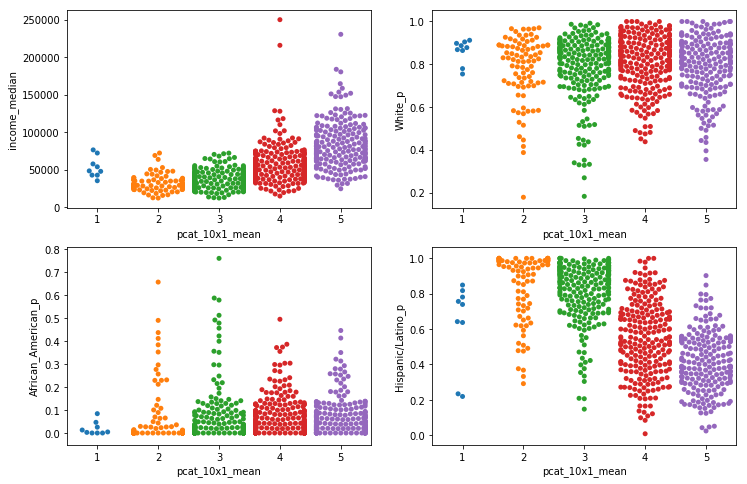

In [61]:
four_swarm(train)

#### a great visualization on how race effects broadband connectivity. As the percentage of hispanics go up, the connectivity goes down. Looks the opposite for whites 

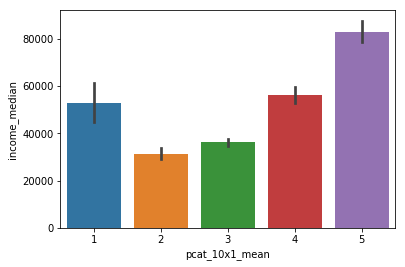

In [63]:
sns.barplot(x="pcat_10x1_mean", y="income_median", data=train)

#### interesting....the 1 connectivity category has a higher income than the 2 and 3 category. It could be due to low population in that area or possibly age

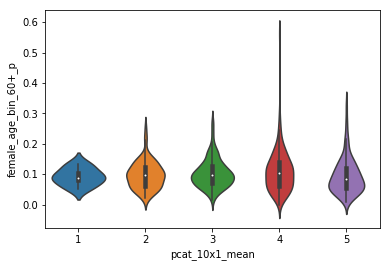

In [22]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_60+_p", data=train)

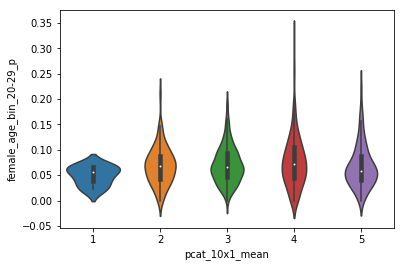

In [23]:
sns.violinplot(x="pcat_10x1_mean", y="female_age_bin_20-29_p", data=train)

#### it appears that there is not a huge difference between these two groups

#### median income looks to be highly positively correlated with pcat_10x1. There's also a strong negative correlation with Hispanic/Latino and pcat_10x1

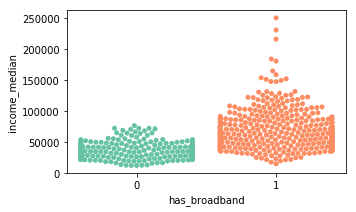

In [25]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="income_median", data=train, palette="Set2")


#### Internet adoption by median income

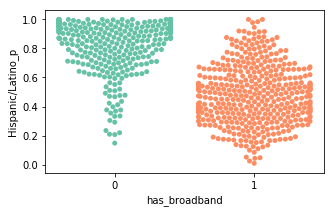

In [26]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="Hispanic/Latino_p", data=train, palette="Set2")

(0, 1.0)

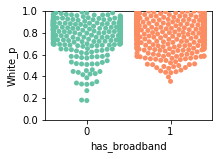

In [27]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="White_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

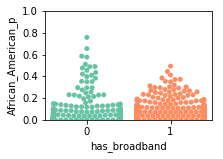

In [28]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="African_American_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

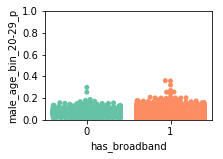

In [29]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_20-29_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

(0, 1.0)

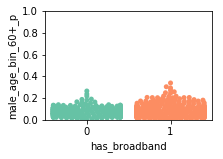

In [30]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_60+_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

# Chi-Square Tests

In [36]:
# Chi Square - control for socio between two race groups. compare wo groups of hispanics. one in high one in low.
# sencond test - within a socio group that tends toward no internet, is there a difference between a non-minority race and a minority race. low socio for whites compared to low socio for hispanics/etc.

# accessability/adoptability

In [37]:
from scipy.stats import chisquare

### Comparing low socio Hispanics with high socio Hispanics

In [38]:
## Low socio Hispanics
df_low_socio_hisp = df.where(df['income_median'] < 30000).dropna()
df_low_socio_hisp = df_low_socio_hisp.where(df_low_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna().head(73)
df_low_socio_hisp.shape

(73, 27)

In [39]:
## High socio Hispanics
df_high_socio_hisp = df.where(df['income_median'] > 56000).dropna()
df_high_socio_hisp = df_high_socio_hisp.where(df_high_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna()
df_high_socio_hisp.shape

(73, 27)

In [40]:
stats.chisquare(df_low_socio_hisp['pcat_10x1_mean'], df_high_socio_hisp['pcat_10x1_mean'])

Power_divergenceResult(statistic=51.41666666666666, pvalue=0.9682655961050642)

### Comparing low socio Hispanics with low socio Whites

In [41]:
## Low socio Hispanics
df_low_socio_hisp = df.where(df['income_median'] < 30000).dropna()
df_low_socio_hisp = df_low_socio_hisp.where(df_low_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna().head(162)
df_low_socio_hisp.shape

(162, 27)

In [42]:
## Low socio Whites
df_low_socio_white = df.where(df['income_median'] < 30000).dropna()
df_low_socio_white = df_low_socio_white.where(df_low_socio_white['White_p'] > 0.60).dropna()
df_low_socio_white.shape

(162, 27)

In [43]:
stats.chisquare(df_low_socio_hisp['pcat_10x1_mean'], df_low_socio_white['pcat_10x1_mean'])

Power_divergenceResult(statistic=37.08333333333333, pvalue=1.0)

#### Comparing low socio Hispanics with high socio Hispanics binary

In [44]:
## Low socio Hispanics
df_low_socio_hisp = df.where(df['income_median'] < 30000).dropna()
df_low_socio_hisp = df_low_socio_hisp.where(df_low_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna().head(73)
df_low_socio_hisp.shape

(73, 27)

In [45]:
## High socio Hispanics
df_high_socio_hisp = df.where(df['income_median'] > 56000).dropna()
df_high_socio_hisp = df_high_socio_hisp.where(df_high_socio_hisp['Hispanic/Latino_p'] > 0.60).dropna()
df_high_socio_hisp.shape

(73, 27)

In [46]:
stats.chisquare(df_low_socio_hisp['has_broadband'], df_high_socio_hisp['has_broadband'])

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=nan, pvalue=nan)

### abc

In [53]:
def broadband_access(df):
    target='Broadband Access'

    races_d= {'White_p':'White/Caucasian', 'African_American_p':'African American', 'Native_American_p':'Native American/ Indian',
           'Asian_p':'Asian', 'Hawaiian_Pac_Islander_p':'Hawaiin/PacIslander', 'Hispanic/Latino_p':'Hispanic/Latino'}
    ddf = df.rename(columns={'pcat_10x1_mean':target}).rename(columns=races_d)

    races = list(races_d.values())
    income = ['income_median', 'income_0-19k_p',
           'income_20-24k_p', 'income_25-39k_p', 'income_40-64k_p',
           'income_65k+_p']

    plt.figure(figsize=(12,5))
    plt.subplot(221)
    sns.heatmap(ddf[races+[target]].corr().drop(columns=races).drop([target]),annot=True,cmap='Blues')

    plt.subplot(223)
    sns.heatmap(ddf[income+[target]].corr().drop(columns=income).drop([target]),annot=True,cmap='Greens')

### abc2

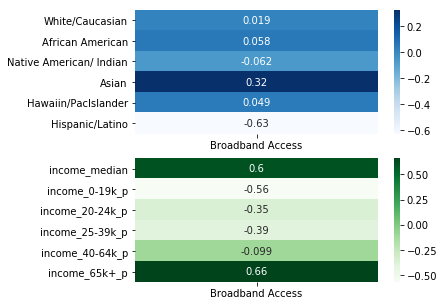

In [55]:
broadband_access(train)